In [38]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import trustworthiness
import Template

Template = Template.Template()

# import the data from all sheets of the Excel file

df0 = pd.read_excel('Datos1_InteraccionesNIR.xlsx', sheet_name=0)
df1 = pd.read_excel('Datos1_InteraccionesNIR.xlsx', sheet_name=1)
df2 = pd.read_excel('Datos1_InteraccionesNIR.xlsx', sheet_name=2)
df3 = pd.read_excel('Datos1_InteraccionesNIR.xlsx', sheet_name=3)

# Concatenate all sheets into a single DataFrame
df = pd.concat([df0, df1, df2, df3], ignore_index=True)

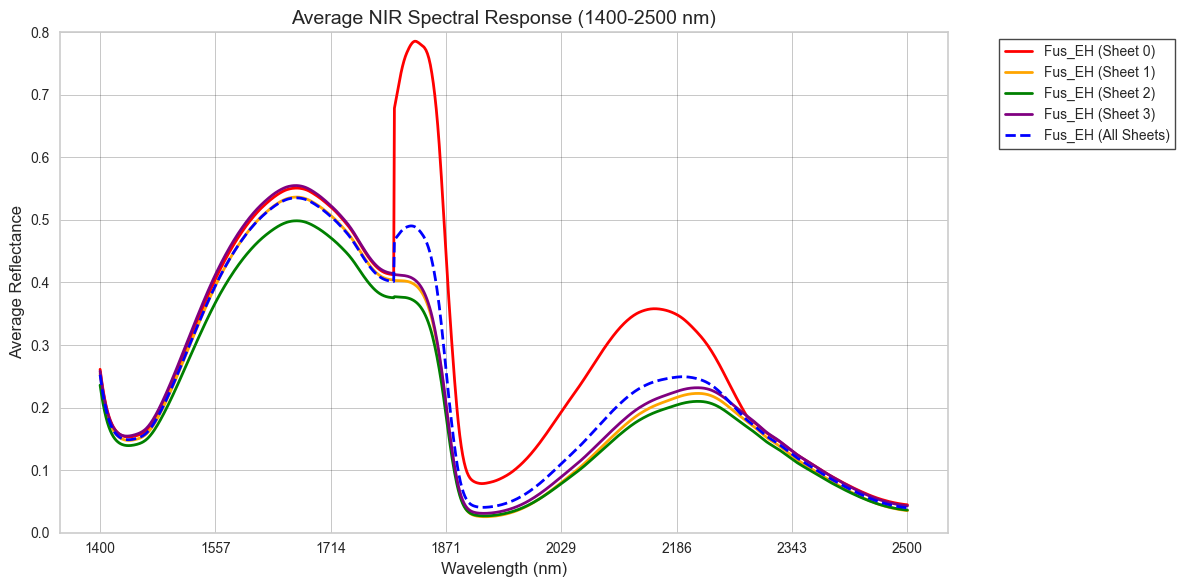

In [39]:
# Create a single figure for all plant indices
plt.figure(figsize=(12, 6))

# Filter wavelengths between 1400 and 2500
wavelengths = [int(col) for col in df.columns if str(col).isdigit() and 1400 <= int(col) <= 2500]

fus_df_0 = df0[df0['Tratamiento'] == 'Fus_EH'][wavelengths].mean()
plt.plot(wavelengths, fus_df_0, label='Fus_EH (Sheet 0)', color='red')

fus_df_1 = df1[df1['Tratamiento'] == 'Fus_EH'][wavelengths].mean()
plt.plot(wavelengths, fus_df_1, label='Fus_EH (Sheet 1)', color='orange')

fus_df_2 = df2[df2['Tratamiento'] == 'Fus_EH'][wavelengths].mean()
plt.plot(wavelengths, fus_df_2, label='Fus_EH (Sheet 2)', color='green')

fus_df_3 = df3[df3['Tratamiento'] == 'Fus_EH'][wavelengths].mean()
plt.plot(wavelengths, fus_df_3, label='Fus_EH (Sheet 3)', color='purple')


fus_df = df[df['Tratamiento'] == 'Fus_EH'][wavelengths]
plt.plot(wavelengths, fus_df.mean(), label='Fus_EH (All Sheets)', color='blue', linewidth=2, linestyle='--')



# Customize plot
plt.xlabel('Wavelength (nm)')
plt.ylabel('Average Reflectance')
plt.title('Average NIR Spectral Response (1400-2500 nm)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(np.linspace(min(wavelengths), max(wavelengths), 8))

# Set y-axis limits to zoom in on the differences
plt.ylim(0, 0.8) 

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

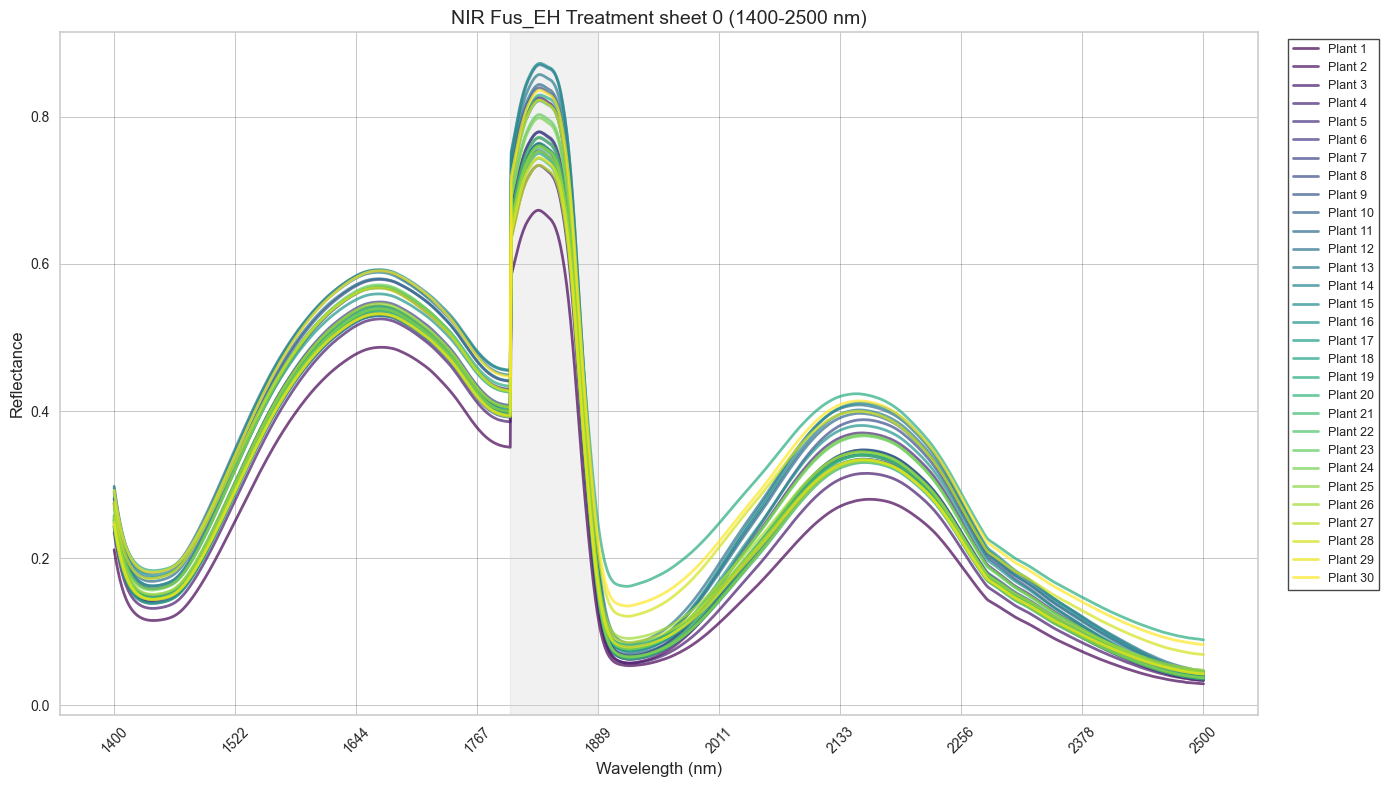

In [40]:
# Set up a larger figure with a good aspect ratio
plt.figure(figsize=(14, 8))

# Get all unique plant values in Fus_EH treatment from df0
fus_plants = df0[df0['Tratamiento'] == 'Fus_EH']['Planta'].unique()

# Create a colormap that will visually distinguish plants
colors = plt.cm.viridis(np.linspace(0, 1, len(fus_plants)))

# Plot each plant's spectral signature
for i, plant in enumerate(fus_plants):
    plant_data = df0[(df0['Tratamiento'] == 'Fus_EH') & (df0['Planta'] == plant)][wavelengths]
    
    if not plant_data.empty:
        plt.plot(wavelengths, plant_data.values[0], 
                 color=colors[i], 
                 label=f'Plant {plant}',
                 alpha=0.7)

# Customize plot
plt.xlabel('Wavelength (nm)', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
plt.title('NIR Fus_EH Treatment sheet 0 (1400-2500 nm)', fontsize=14)
plt.grid(True, alpha=0.3)

# Format x-axis with evenly spaced ticks
plt.xticks(np.linspace(min(wavelengths), max(wavelengths), 10), rotation=45)

# Create a more user-friendly legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=9)

# Highlight regions of interest 
plt.axvspan(1800, 1889, color='lightgray', alpha=0.3)

# Add some padding around the plot
plt.tight_layout()

# Show the plot
plt.show()

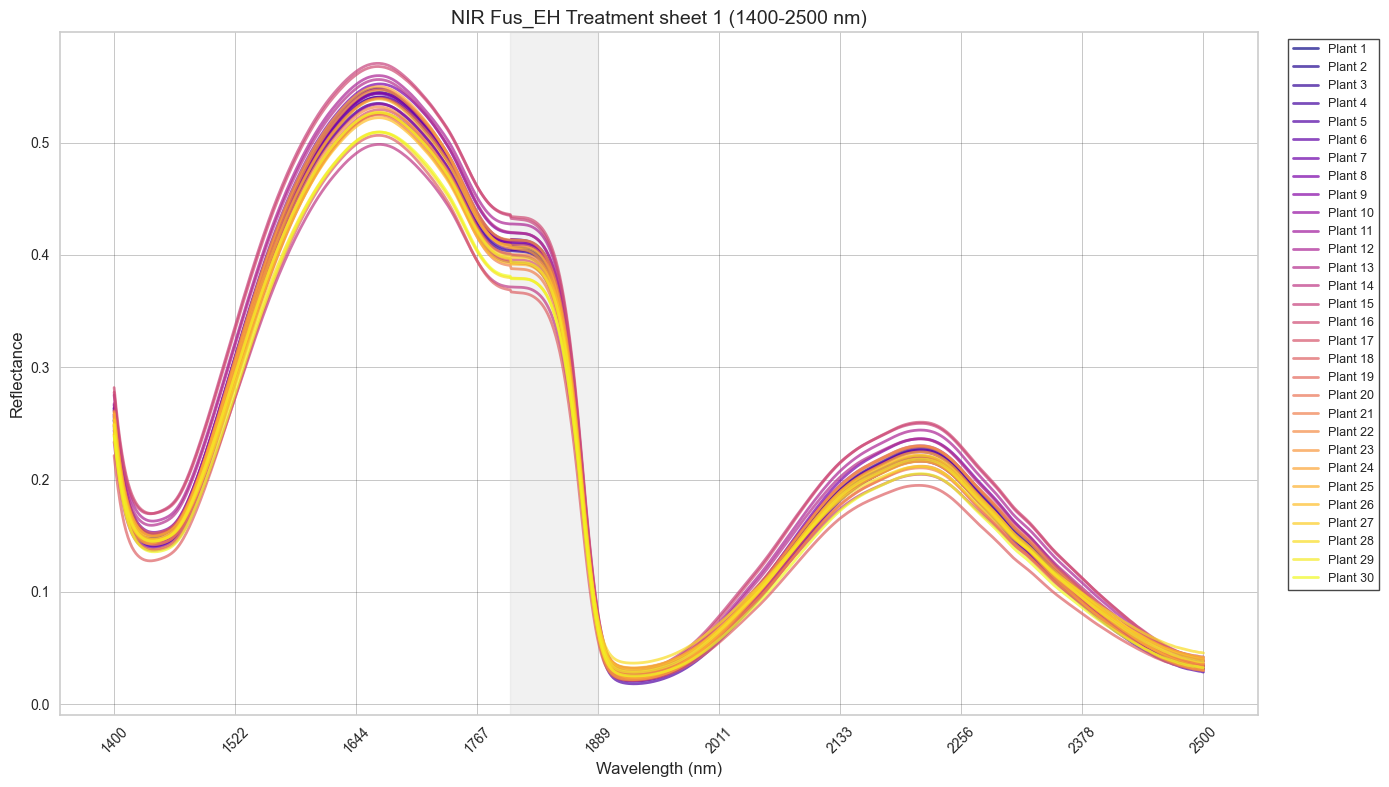

In [46]:
# Set up a larger figure with a good aspect ratio
plt.figure(figsize=(14, 8))

# Get all unique plant values in Fus_EH treatment from df1
fus_plants = df1[df1['Tratamiento'] == 'Fus_EH']['Planta'].unique()

# Create a colormap that will visually distinguish plants
colors = plt.cm.plasma(np.linspace(0, 1, len(fus_plants)))


# Plot each plant's spectral signature
for i, plant in enumerate(fus_plants):
    plant_data = df1[(df1['Tratamiento'] == 'Fus_EH') & (df1['Planta'] == plant)][wavelengths]
    
    if not plant_data.empty:
        plt.plot(wavelengths, plant_data.values[0], 
                 color=colors[i], 
                 label=f'Plant {plant}',
                 alpha=0.7)

# Customize plot
plt.xlabel('Wavelength (nm)', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
plt.title('NIR Fus_EH Treatment sheet 1 (1400-2500 nm)', fontsize=14)
plt.grid(True, alpha=0.3)

# Format x-axis with evenly spaced ticks
plt.xticks(np.linspace(min(wavelengths), max(wavelengths), 10), rotation=45)

# Create a more user-friendly legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=9)

# Highlight regions of interest 
plt.axvspan(1800, 1889, color='lightgray', alpha=0.3)

# Add some padding around the plot
plt.tight_layout()

# Show the plot
plt.show()

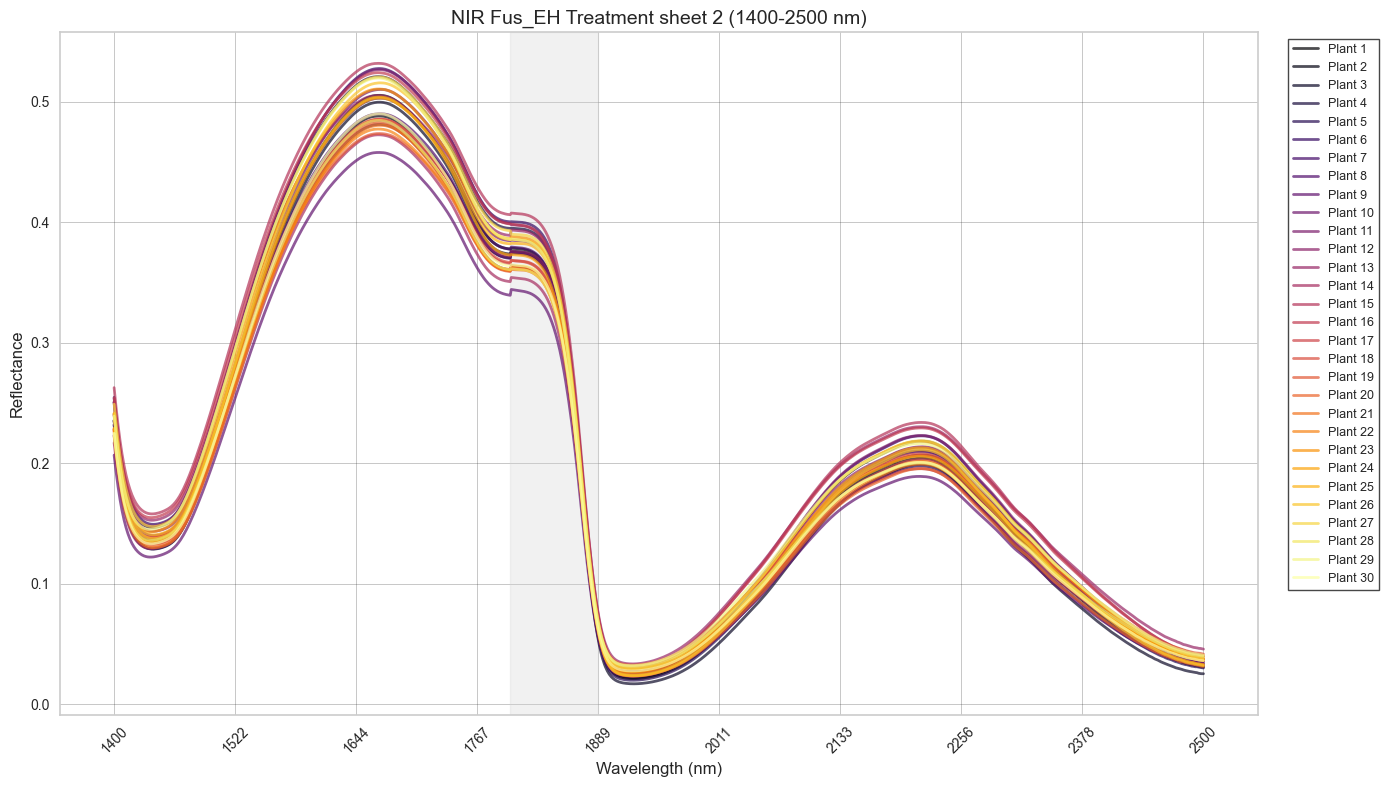

In [47]:
# Set up a larger figure with a good aspect ratio
plt.figure(figsize=(14, 8))

# Get all unique plant values in Fus_EH treatment from df2
fus_plants = df2[df2['Tratamiento'] == 'Fus_EH']['Planta'].unique()

# Create a colormap that will visually distinguish plants
colors = plt.cm.inferno(np.linspace(0, 1, len(fus_plants)))

# Plot each plant's spectral signature
for i, plant in enumerate(fus_plants):
    plant_data = df2[(df2['Tratamiento'] == 'Fus_EH') & (df2['Planta'] == plant)][wavelengths]
    
    if not plant_data.empty:
        plt.plot(wavelengths, plant_data.values[0], 
                 color=colors[i], 
                 label=f'Plant {plant}',
                 alpha=0.7)

# Customize plot
plt.xlabel('Wavelength (nm)', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
plt.title('NIR Fus_EH Treatment sheet 2 (1400-2500 nm)', fontsize=14)
plt.grid(True, alpha=0.3)

# Format x-axis with evenly spaced ticks
plt.xticks(np.linspace(min(wavelengths), max(wavelengths), 10), rotation=45)

# Create a more user-friendly legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=9)

# Highlight regions of interest 
plt.axvspan(1800, 1889, color='lightgray', alpha=0.3)

# Add some padding around the plot
plt.tight_layout()

# Show the plot
plt.show()

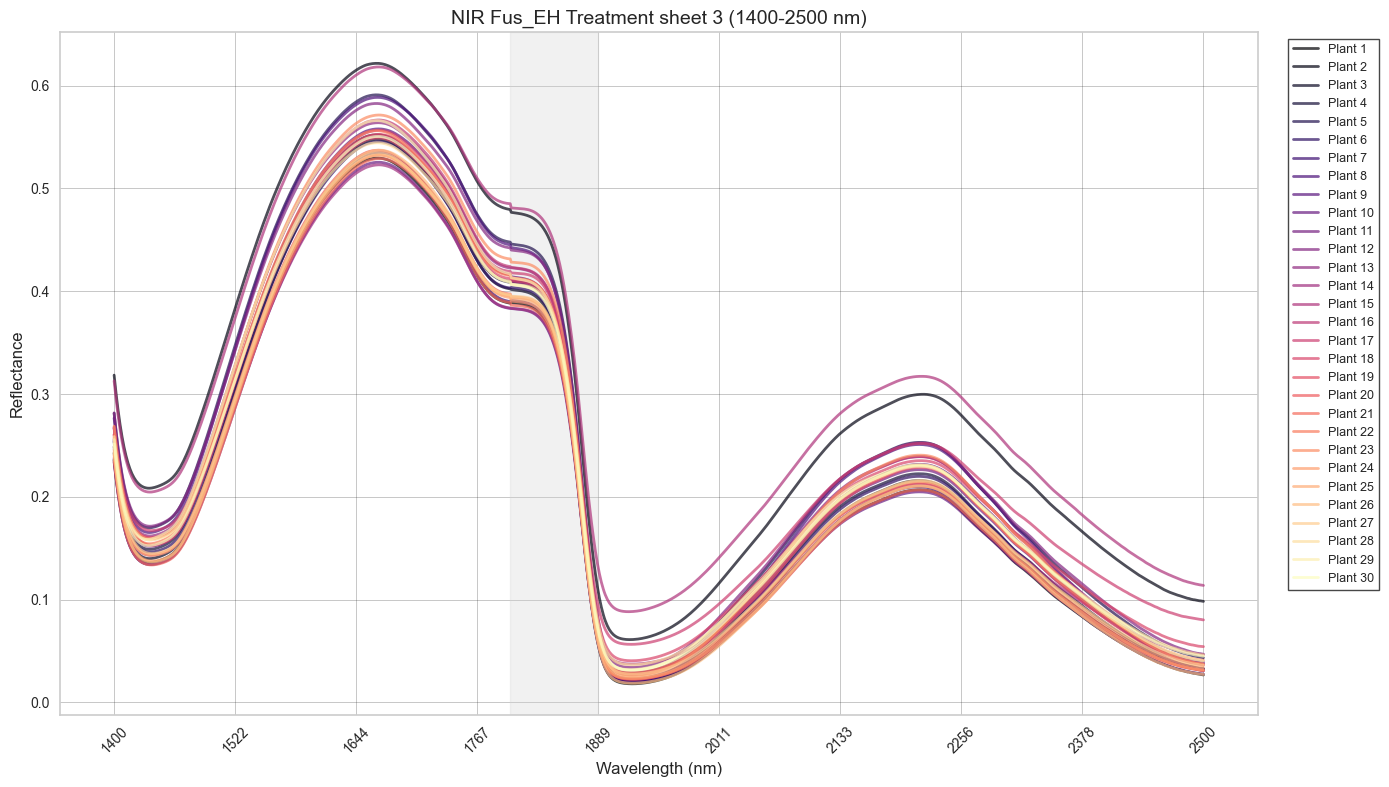

In [48]:
# Set up a larger figure with a good aspect ratio
plt.figure(figsize=(14, 8))

# Get all unique plant values in Fus_EH treatment from df3
fus_plants = df3[df3['Tratamiento'] == 'Fus_EH']['Planta'].unique()

# Create a colormap that will visually distinguish plants
colors = plt.cm.magma(np.linspace(0, 1, len(fus_plants)))

# Plot each plant's spectral signature
for i, plant in enumerate(fus_plants):
    plant_data = df3[(df3['Tratamiento'] == 'Fus_EH') & (df3['Planta'] == plant)][wavelengths]
    
    if not plant_data.empty:
        plt.plot(wavelengths, plant_data.values[0], 
                 color=colors[i], 
                 label=f'Plant {plant}',
                 alpha=0.7)

# Customize plot
plt.xlabel('Wavelength (nm)', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
plt.title('NIR Fus_EH Treatment sheet 3 (1400-2500 nm)', fontsize=14)
plt.grid(True, alpha=0.3)

# Format x-axis with evenly spaced ticks
plt.xticks(np.linspace(min(wavelengths), max(wavelengths), 10), rotation=45)

# Create a more user-friendly legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=9)

# Highlight regions of interest 
plt.axvspan(1800, 1889, color='lightgray', alpha=0.3)

# Add some padding around the plot
plt.tight_layout()

# Show the plot
plt.show()

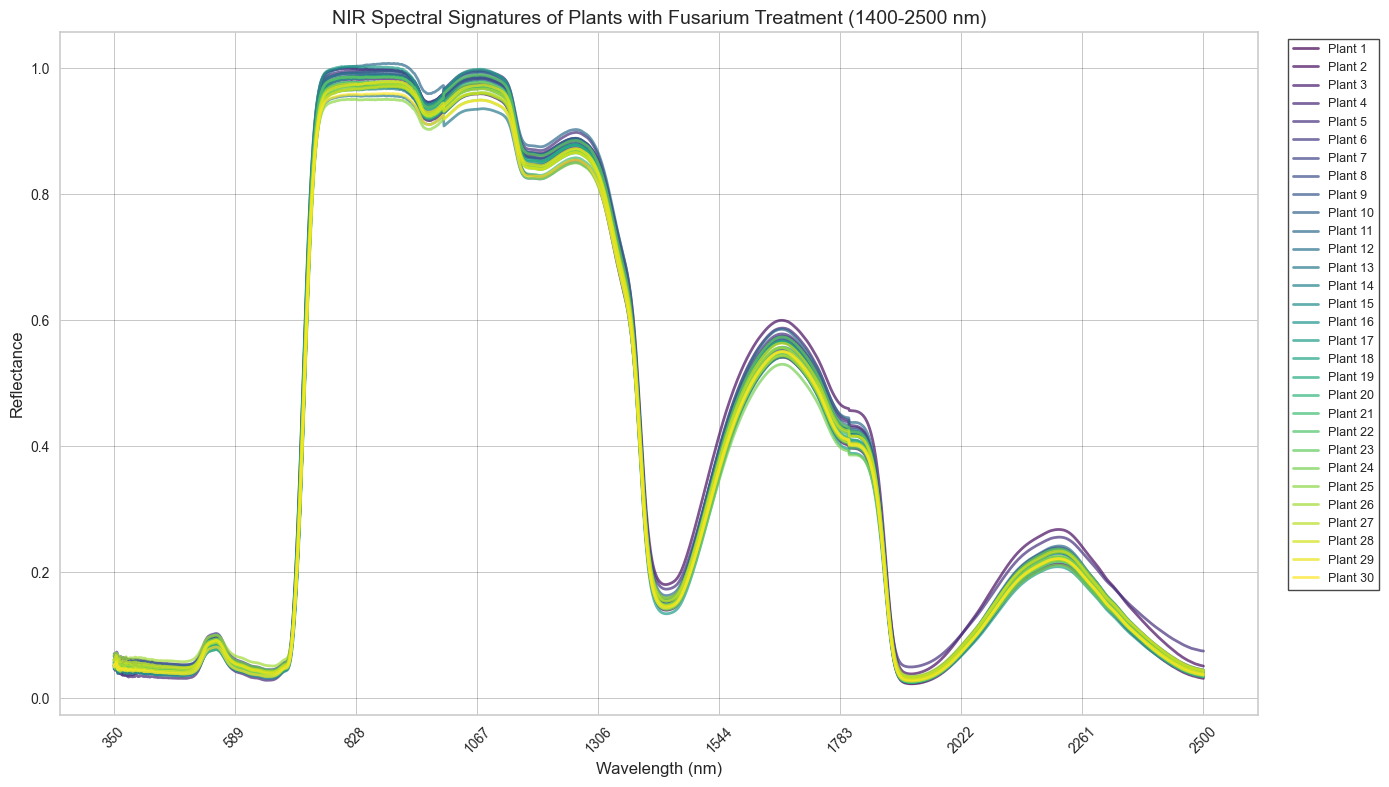

In [44]:
wavelengths_1 = [int(col) for col in df.columns if str(col).isdigit()]

# Set up a larger figure with a good aspect ratio
plt.figure(figsize=(14, 8))

# Get all unique plant values in Fusarium treatment from df0
fus_plants = df0[df0['Tratamiento'] == 'Fusarium']['Planta'].unique()

# Create a colormap that will visually distinguish plants
colors = plt.cm.viridis(np.linspace(0, 1, len(fus_plants)))

# Plot each plant's spectral signature
for i, plant in enumerate(fus_plants):
    plant_data = df0[(df0['Tratamiento'] == 'Fusarium') & (df0['Planta'] == plant)][wavelengths_1]
    
    if not plant_data.empty:
        plt.plot(wavelengths_1, plant_data.values[0], 
                 color=colors[i], 
                 label=f'Plant {plant}',
                 alpha=0.7)

# Customize plot
plt.xlabel('Wavelength (nm)', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
plt.title('NIR Spectral Signatures of Plants with Fusarium Treatment (1400-2500 nm)', fontsize=14)
plt.grid(True, alpha=0.3)

# Format x-axis with evenly spaced ticks
plt.xticks(np.linspace(min(wavelengths_1), max(wavelengths_1), 10), rotation=45)

# Create a more user-friendly legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=9)

# Add some padding around the plot
plt.tight_layout()

# Show the plot
plt.show()